In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd

In [2]:
# Load the heart disease dataset
heart_data = r'C:\Users\Musab Sarmad\Desktop\Binary Heart Classification Model\dataset\heart_cleveland_upload.csv'
heart_data_df = pd.read_csv(heart_data)

In [3]:
heart_data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
heart_data_df.shape

(297, 14)

In [5]:
heart_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
heart_data_df_copy = heart_data_df.copy()

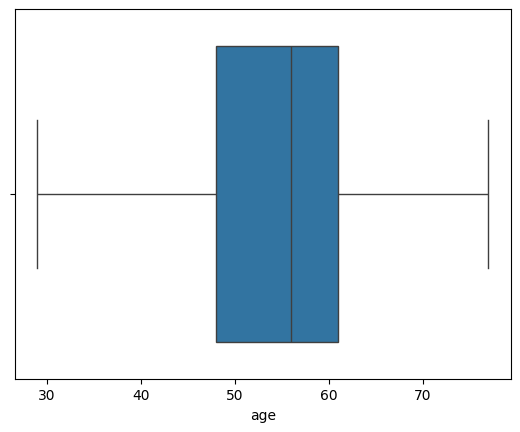

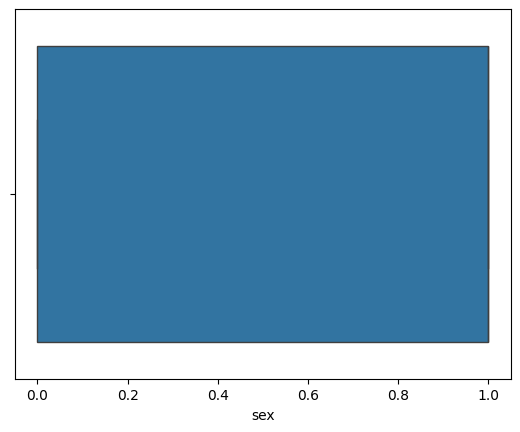

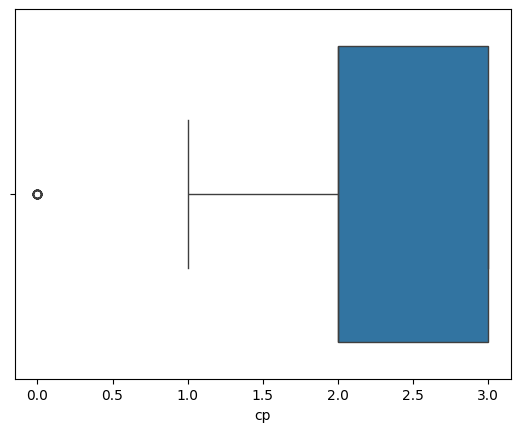

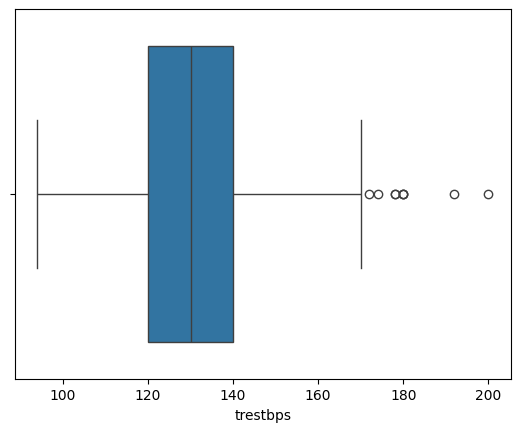

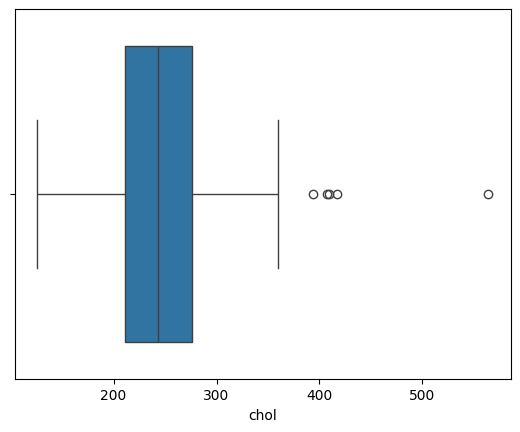

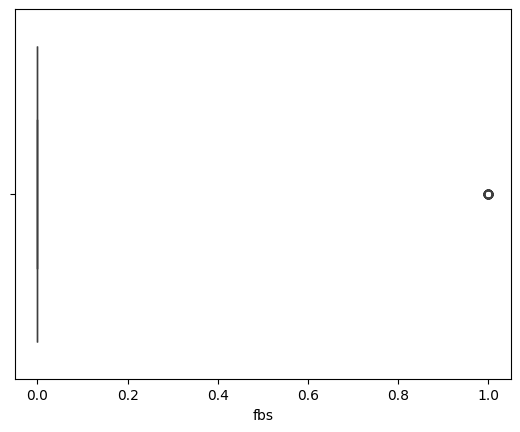

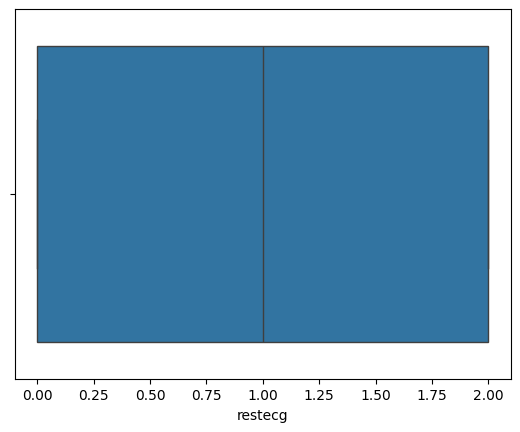

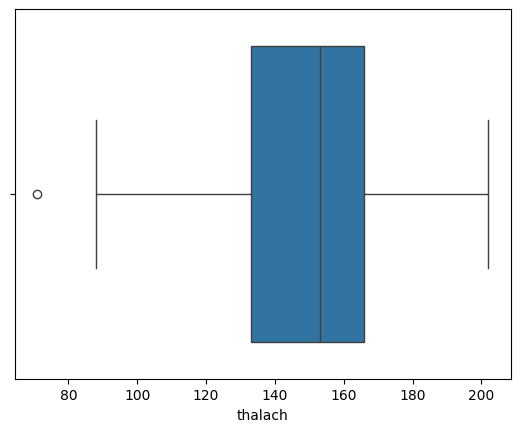

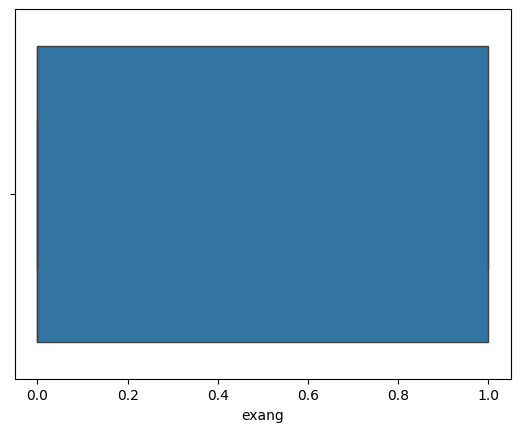

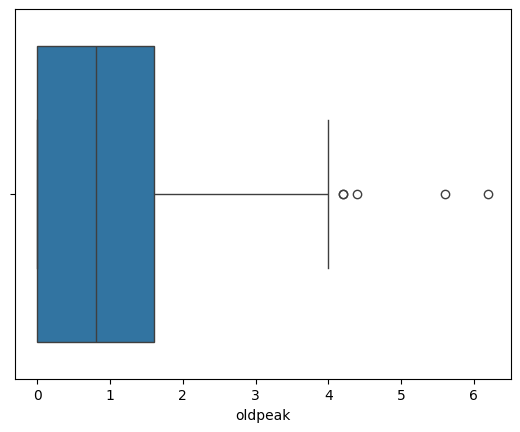

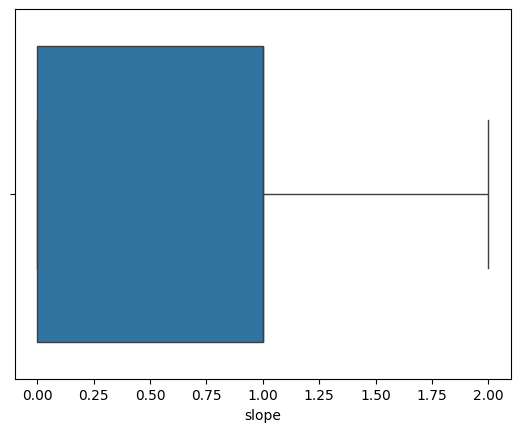

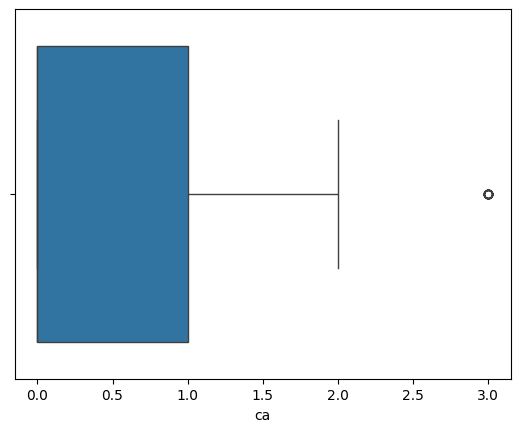

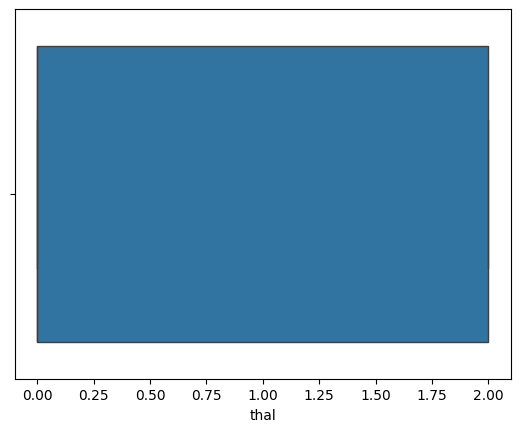

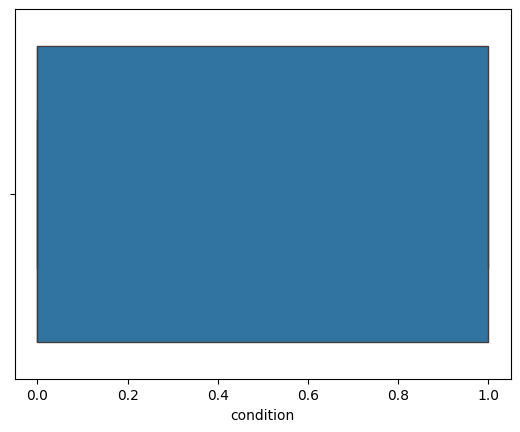

In [7]:
for i in heart_data_df.columns:
    sns.boxplot(x = heart_data_df[i])
    plt.show()

In [8]:
heart_data_df_copy = heart_data_df.copy()

<Axes: xlabel='condition', ylabel='count'>

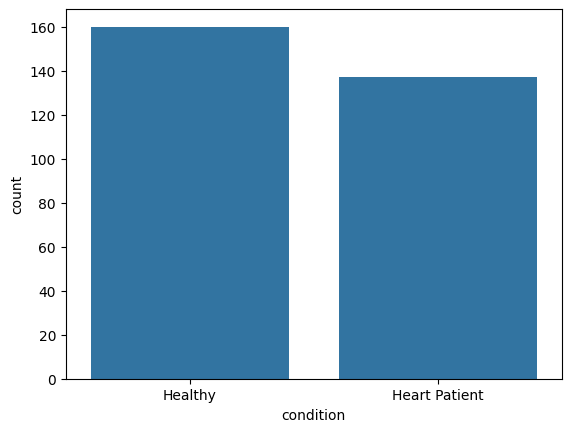

In [9]:
# comparing healthy vs heart patients
heart_data_df_copy.condition = heart_data_df_copy.condition.map({0:"Healthy", 1:"Heart Patient"})
sns.countplot(x='condition', data=heart_data_df_copy)

In [10]:
# Check the column names in the dataframe
print("Column names in heart_data_df:")
print(heart_data_df.columns.tolist())
print("\nColumn names in heart_data_df_copy:")
print(heart_data_df_copy.columns.tolist())

Column names in heart_data_df:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']

Column names in heart_data_df_copy:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


<Axes: xlabel='sex', ylabel='count'>

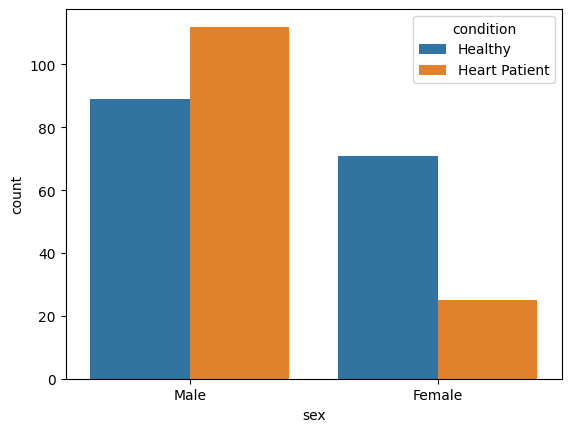

In [11]:
#comparing number of males vs females

heart_data_df_copy.sex = heart_data_df_copy.sex.map({0:"Female", 1:"Male"})
sns.countplot(x='sex', data=heart_data_df_copy, hue='condition')

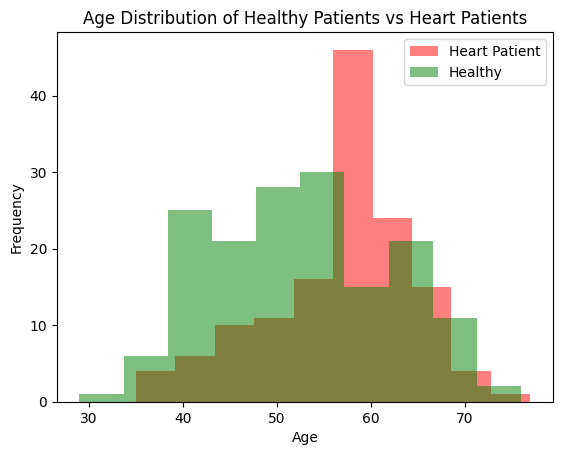

In [12]:
# age vs healthy patients

plt.hist(heart_data_df_copy[heart_data_df_copy.condition == "Heart Patient"]['age'], bins=10, color='red', alpha=0.5, label='Heart Patient')
plt.hist(heart_data_df_copy[heart_data_df_copy.condition == "Healthy"]['age'], bins=10, color='green', alpha=0.5, label='Healthy')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Healthy Patients vs Heart Patients')
plt.show()

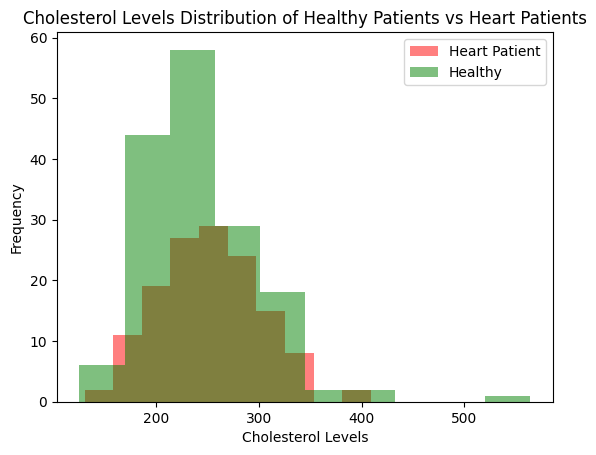

In [13]:
# cholesterol levels vs healthy patients

plt.hist(heart_data_df_copy[heart_data_df_copy.condition == "Heart Patient"]['chol'], bins=10, color='red', alpha=0.5, label='Heart Patient')
plt.hist(heart_data_df_copy[heart_data_df_copy.condition == "Healthy"]['chol'], bins=10, color='green', alpha=0.5, label='Healthy')
plt.legend()
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.title('Cholesterol Levels Distribution of Healthy Patients vs Heart Patients')
plt.show()

In [14]:
# dividing columns for input and output
X = heart_data_df.drop(columns='condition', axis=1)
Y = heart_data_df['condition']


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [16]:
X.shape, Y.shape

((297, 13), (297,))

In [17]:
model = keras.Sequential()
model.add(layers.Dense(11, activation='relu', input_shape=(13,)))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Musab Sarmad\Desktop\Binary Heart Classification Model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           154 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166 (664.00 B)

 Trainable params: 166 (664.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_fit = model.fit(X, Y, epochs=300, validation_split=0.3)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.6329 - loss: 32.7099 - val_accuracy: 0.3222 - val_loss: 54.6606
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6329 - loss: 28.6358 - val_accuracy: 0.3222 - val_loss: 47.6102
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6329 - loss: 24.7091 - val_accuracy: 0.3222 - val_loss: 40.5958
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6329 - loss: 20.7187 - val_accuracy: 0.3222 - val_loss: 33.6973
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6135 - loss: 17.1058 - val_accuracy: 0.3222 - val_loss: 26.7412
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5749 - loss: 13.4734 - val_accuracy: 0.3222 - val_loss: 20.4231
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4734 - loss: 10.9199 - val_accuracy: 0.3000 - val_loss: 15.2790
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4010 - loss: 9.5768 - val_accuracy: 0.27

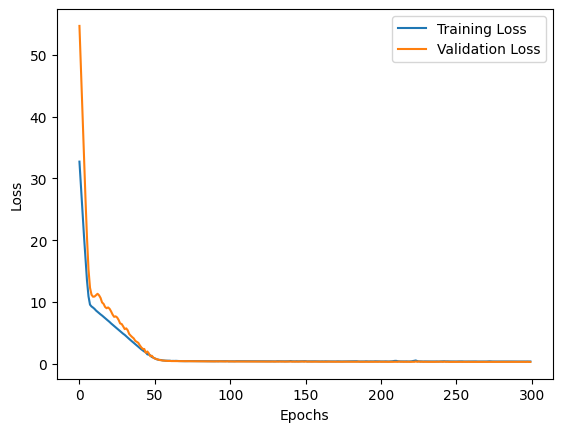

In [20]:
# plotting training and validation loss
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

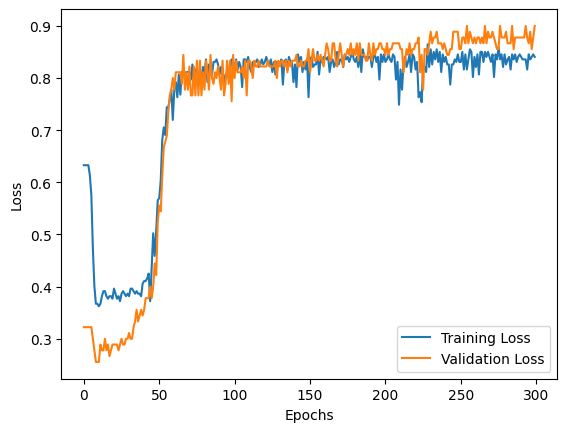

In [21]:
# training accuracy vs vallidation accuracy

plt.plot(model_fit.history['accuracy'], label='Training Loss')
plt.plot(model_fit.history['val_accuracy'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [22]:
import numpy
from numpy import array
#the input data for 13 features
Xnew = numpy.array([[67,1,0,125,254,1,1,163,0,0.2,1,2,3]])

#convert the values in the array to float
Xnew = numpy.array(Xnew, dtype=numpy.float64)

#making the prediction from probability
Ynew = (model.predict(Xnew) > 0.5).astype("int32")

#print the prediction
print(Ynew[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[1]


In [23]:
heart_data = r'C:\Users\Musab Sarmad\Desktop\Binary Heart Classification Model\dataset\heart_cleveland_secondary.csv'
heart_data_df_testing = pd.read_csv(heart_data)

In [24]:
heart_data_df_testing.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
1,58,0,3,100,248,0,2,122,0,1.0,1,0,0,0
2,41,1,1,110,235,0,0,153,0,0.0,0,0,0,0
3,68,0,2,120,211,0,2,115,0,1.5,1,0,0,0
4,48,1,1,130,245,0,2,180,0,0.2,1,0,0,0


In [25]:
X_test = heart_data_df_testing.drop("condition", axis=1)
Y_test = heart_data_df_testing['condition']
# dividing columns for input and output

In [26]:
eval_history = model.evaluate(X, Y)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8519 - loss: 0.3579 


In [27]:
# Show the required feature order for model input
assert 'X' in globals(), "Feature matrix X not found. Run the data prep cells first."
feature_order = list(X.columns)
print("Feature order for model input (use this order if passing a list):")
print(feature_order)

Feature order for model input (use this order if passing a list):
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


### Predicting a single patient

- Use `predict_hypothetical(sample, threshold=0.5)` to get a probability (0–1) and a label (0=Healthy, 1=Heart Patient).
- Inputs:
  - Dict: keys must match feature names in `feature_order` (recommended).
  - List: values must be in the exact `feature_order` shown above.
- Requirements: run training cells to create `model`, and run the feature-order cell so `feature_order` exists.
- Errors:
  - Dict missing any feature -> error listing missing keys.
  - List length not equal to number of features -> error.
- Optional: adjust `threshold` to change the decision cutoff (default 0.5).

In [28]:
# Simple helper to predict for one patient using the trained model

def predict_hypothetical(sample, threshold=0.5):
    """
    sample: dict keyed by feature names OR list in feature_order
    returns: (probability, label) where label is 0=Healthy, 1=Heart Patient
    """
    assert 'model' in globals() and 'feature_order' in globals(), "Run training and feature order cells first."

    if isinstance(sample, dict):
        row = [sample.get(f) for f in feature_order]
        if any(v is None for v in row):
            missing = [f for f, v in zip(feature_order, row) if v is None]
            raise ValueError(f"Missing features: {missing}")
    else:
        row = list(sample)
        if len(row) != len(feature_order):
            raise ValueError(f"Need {len(feature_order)} values in order {feature_order}.")

    x = np.array([row], dtype=np.float64)
    prob = float(model.predict(x, verbose=0)[0][0])
    return prob, int(prob > threshold)

# Example (dict)
example = dict(zip(feature_order, [67,1,0,125,254,1,1,163,0,0.2,1,2,3]))
p, y = predict_hypothetical(example)
print({'probability': p, 'predicted_label': y, 'label_meaning': ('Healthy','Heart Patient')[y]})

# Example (list)
# p, y = predict_hypothetical([67,1,0,125,254,1,1,163,0,0.2,1,2,3])
# print(p, y)

{'probability': 0.6492266654968262, 'predicted_label': 1, 'label_meaning': 'Heart Patient'}
